<a href="https://colab.research.google.com/github/spentaur/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [52]:
!wget https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip

--2019-07-19 02:14:51--  https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2019Q1.csv.zip’

LoanStats_2019Q1.cs     [    <=>             ]  19.30M   839KB/s    in 24s     

2019-07-19 02:15:15 (831 KB/s) - ‘LoanStats_2019Q1.csv.zip’ saved [20240936]



In [53]:
!unzip LoanStats_2019Q1.csv.zip

Archive:  LoanStats_2019Q1.csv.zip
  inflating: LoanStats_2019Q1.csv    


In [54]:
!head LoanStats_2019Q1.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('LoanStats_2019Q1.csv', skiprows=1, skipfooter=2, engine='python', skipinitialspace=True)

In [0]:
print(df.shape)
df.head()

(115675, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,...,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000,12000,12000,36 months,16.40%,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,...,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000,3000,3000,36 months,14.74%,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,...,71.4,0,0,69911,37816,11400,35811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000,35000,35000,36 months,15.57%,1223.08,C,C3,Store Manager,10+ years,RENT,122000.0,Verified,Mar-2019,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,22.00,1,Dec-2009,0,20.0,NaN,5,0,1441,24.4%,18,w,33459.43,33459.43,2446.76,2446.76,...,100.0,0,0,65640,24471,1600,59740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5000,5000,5000,36 months,15.57%,174.73,C,C3,Area Manager,3 years,OWN,65000.0,Verified,Mar-2019,Current,n,NaN,NaN,house,Home buying,640xx,MO,16.28,1,Jul-2001,0,7.0,NaN,9,0,5604,64.4%,25,w,4778.86,4778.86,340.81,340.81,...,50.0,0,0,38190,29775,4400,29490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.isna().sum()

id                                            115675
member_id                                     115675
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      19518
emp_length                                     11101
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [0]:
df.isna().mean().round(4) * 100

id                                            100.00
member_id                                     100.00
loan_amnt                                       0.00
funded_amnt                                     0.00
funded_amnt_inv                                 0.00
term                                            0.00
int_rate                                        0.00
installment                                     0.00
grade                                           0.00
sub_grade                                       0.00
emp_title                                      16.87
emp_length                                      9.60
home_ownership                                  0.00
annual_inc                                      0.00
verification_status                             0.00
issue_d                                         0.00
loan_status                                     0.00
pymnt_plan                                      0.00
url                                           

In [0]:
# df.dropna(axis=1, thresh=int(0.7*len(df)), inplace=True)

In [0]:
# df.isna().mean().round(4) * 100

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115675 entries, 0 to 115674
Columns: 144 entries, id to settlement_term
dtypes: float64(56), int64(52), object(36)
memory usage: 127.1+ MB


In [0]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [0]:
df.head().T

,0,1,2,3,4
id,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,20000,12000,3000,35000,5000
funded_amnt,20000,12000,3000,35000,5000
funded_amnt_inv,20000,12000,3000,35000,5000
term,60 months,36 months,36 months,36 months,36 months
int_rate,17.19%,16.40%,14.74%,15.57%,15.57%
installment,499.1,424.26,103.62,1223.08,174.73
grade,C,C,C,C,C
sub_grade,C5,C4,C2,C3,C3


## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [0]:
df.describe(include="object").T

,count,unique,top,freq
term,115675,2,36 months,78429
int_rate,115675,53,8.19%,11314
grade,115675,7,A,37060
sub_grade,115675,33,A4,11314
emp_title,96157,39387,Teacher,2037
emp_length,104574,11,10+ years,34490
home_ownership,115675,5,MORTGAGE,58578
verification_status,115675,3,Not Verified,54608
issue_d,115675,3,Jan-2019,43584
loan_status,115675,6,Current,109176


### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
df['int_rate'] = [float(x.strip('%')) for x in df['int_rate']]

In [0]:
df['int_rate'].dtypes

dtype('float64')

In [0]:
# df.describe(include="object").T

Apply the function to the `int_rate` column

In [0]:
# %timeit np.frombuffer(df['int_rate'].values.astype('|S7').tobytes().replace(b'%',b''), dtype='|S6')

In [0]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,745.24,713.86,0.00,0.0,0.0,Jun-2019,499.10,Jul-2019,Jun-2019,0,50.0,1,Individual,NaN,NaN,NaN,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,2103.0,23647.0,30.0,0,0,150.0,100,1,1,0,5.0,NaN,3.0,50.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000,12000,12000,36 months,16.40,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,524.08,302.57,0.00,0.0,0.0,May-2019,424.26,Jul-2019,Jun-2019,0,30.0,1,Individual,NaN,NaN,NaN,0,0,176551,1,5,2,5,7.0,35115,65.0,3,6,4899,65.0,25600,4,0,3,12,9292.0,3231.0,82.5,0,0,316.0,269,5,5,2,12.0,58.0,7.0,29.0,1,6,8,6,9,10,13,23,8,19,0.0,0,0,6,80.6,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000,3000,3000,36 months,14.74,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,134.36,67.97,0.00,0.0,0.0,May-2019,103.62,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,37816,0

### Clean `emp_title`

Look at top 20 titles

In [0]:
df['emp_title'].head(20)

0        Front desk supervisor
1           Executive Director
2               Office Manager
3               Store Manager 
4                 Area Manager
5                          SVP
6                  VP of Sales
7                        Sales
8                           Rn
9              Project Manager
10           Custom applicator
11                  AV Manager
12    Human Resources Liaison 
13                         NaN
14                       Agent
15             Sales/Marketing
16                         ceo
17                   Route Rep
18                 maintenance
19         Executive Assistant
Name: emp_title, dtype: object

How often is `emp_title` null?

In [0]:
print(df['emp_title'].isna().sum())
df['emp_title'].isna().mean().round(4) * 100

19518


16.869999999999997

Clean the title and handle missing values

In [0]:
df['emp_title'].value_counts(dropna=False)

NaN                                         19518
Teacher                                      2037
Manager                                      1626
Registered Nurse                              898
Driver                                        857
Supervisor                                    655
RN                                            623
Sales                                         586
Office Manager                                574
Project Manager                               540
General Manager                               486
Owner                                         449
Director                                      374
Operations Manager                            313
Engineer                                      309
Truck Driver                                  308
Sales Manager                                 288
Nurse                                         281
Administrative Assistant                      267
Supervisor                                    260


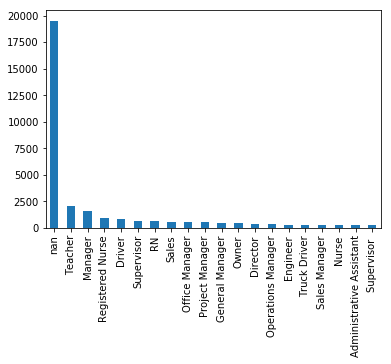

In [0]:
df['emp_title'].value_counts(dropna=False)[:20].plot(kind="bar");

In [0]:
def clean_emp_title(x):
  if isinstance(x, str):
    return x.strip().title()
  else:
    return 'Missing'

In [0]:
df['emp_title'].nunique()

39387

In [0]:
df['emp_title'] = df['emp_title'].apply(clean_emp_title)

In [0]:
df['emp_title'].nunique()

31429

In [0]:
df['emp_title'].value_counts(dropna=False).head(10)

Missing             19518
Teacher              2465
Manager              2172
Registered Nurse     1306
Driver               1194
Supervisor           1109
Office Manager        834
Sales                 806
Truck Driver          767
General Manager       737
Name: emp_title, dtype: int64

In [0]:
int_rate_by_emp_title = df.groupby('emp_title')['int_rate'].mean()
int_rate_by_emp_title.min(), int_rate_by_emp_title.max()

(6.0, 30.84)

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
df['emp_title'].str.contains('Manager', case=False).head(10)

0    False
1    False
2     True
3     True
4     True
5    False
6    False
7    False
8    False
9     True
Name: emp_title, dtype: bool

In [0]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
df['emp_title_manager'].value_counts()

False    99713
True     15962
Name: emp_title_manager, dtype: int64

In [0]:
df.groupby('emp_title_manager')['int_rate'].mean()

emp_title_manager
False    12.744184
True     12.570085
Name: int_rate, dtype: float64

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [0]:
df['issue_d'].head()

0    Mar-2019
1    Mar-2019
2    Mar-2019
3    Mar-2019
4    Mar-2019
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [0]:
df['issue_d'].describe()

count                  115675
unique                      3
top       2019-01-01 00:00:00
freq                    43584
first     2019-01-01 00:00:00
last      2019-03-01 00:00:00
Name: issue_d, dtype: object

In [0]:
df['issue_month'] = df['issue_d'].dt.month

In [0]:
df['issue_month'].value_counts()

1    43584
3    36106
2    35985
Name: issue_month, dtype: int64

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [0]:
df['earliest_cr_line'].head()

0   2006-09-01
1   1992-11-01
2   2004-06-01
3   2009-12-01
4   2001-07-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [0]:
df['day_since_earliest_cr_line'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

In [0]:
df['day_since_earliest_cr_line'].describe()

count    115675.000000
mean       5972.244634
std        2904.216417
min        1124.000000
25%        4141.000000
50%        5358.000000
75%        7367.000000
max       27453.000000
Name: day_since_earliest_cr_line, dtype: float64

In [0]:
for col in [col for col in df if col.endswith("_d")]:
  df[col] = pd.to_datetime(df[col], infer_datetime_format=True)

In [0]:
df.describe(include='datetime')

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,115675,115675,115445,110769,115673
unique,3,652,7,3,7
top,2019-01-01 00:00:00,2006-08-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-06-01 00:00:00
freq,43584,1033,102101,110738,111240
first,2019-01-01 00:00:00,1944-01-01 00:00:00,2019-01-01 00:00:00,2019-06-01 00:00:00,2018-12-01 00:00:00
last,2019-03-01 00:00:00,2016-02-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-06-01 00:00:00


# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
df['term'].value_counts()

 36 months    78429
 60 months    37246
Name: term, dtype: int64

In [0]:
def clean_term(x: str):
  return [int(s) for s in x.split() if s.isdigit()][0]

In [0]:
df['term'] = df['term'].apply(clean_term)

In [0]:
df['term'].value_counts()

36    78429
60    37246
Name: term, dtype: int64

In [0]:
# Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

df['loan_status_is_great'] = np.where(((df['term'] == "Current") | (df['term'] == "Fully Paid")), 1, 0)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

In [0]:
df['revol_util'].value_counts(dropna=False)

0%        1054
43%        210
45%        210
38%        207
35%        207
37%        202
46%        199
32%        196
31%        196
36%        195
32.4%      195
42%        194
47%        193
27%        193
31.9%      193
35.8%      192
34%        190
32.9%      190
58%        190
33.5%      190
49%        187
46.5%      187
36.8%      186
22.8%      186
33%        186
36.9%      186
34.8%      185
37.2%      185
33.8%      185
39.5%      185
63%        184
46.8%      184
62%        184
38.4%      184
31.3%      184
26%        184
57%        184
24.8%      184
28%        183
37.8%      183
44%        183
40%        182
44.9%      182
40.9%      182
41.1%      182
28.3%      182
28.4%      181
27.2%      181
41%        180
34.5%      180
30%        180
40.5%      180
31.7%      179
20.6%      179
34.3%      179
27.4%      178
40.3%      178
34.1%      178
34.9%      177
39.3%      177
28.6%      177
39.8%      177
23.8%      176
41.3%      175
30.9%      175
38.9%      174
51%       

In [0]:
df['revol_util'].isna().sum()/ len(df['revol_util'])

0.0

In [0]:
df['revol_util'].dropna(inplace=True)

In [0]:
df['revol_util'].isna().sum()/ len(df['revol_util'])

0.0

In [0]:
len([float(x.strip('%')) for x in df['revol_util']])

115546

In [0]:
len([x for x in df['revol_util']])

115546

In [0]:
len(df['revol_util'])

115546

In [0]:
df['revol_util'] = df['revol_util'].apply(lambda x : float(x.strip('%')))

In [0]:
df['revol_util'].head()

0    19.7
1    64.9
2    60.1
3    24.4
4    64.4
Name: revol_util, dtype: float64

In [0]:
top20_emp_title = df['emp_title'].value_counts(dropna=False).index.values.tolist()[:20]
top20_emp_title

['Missing',
 'Teacher',
 'Manager',
 'Registered Nurse',
 'Driver',
 'Supervisor',
 'Office Manager',
 'Sales',
 'Truck Driver',
 'General Manager',
 'Rn',
 'Owner',
 'Project Manager',
 'Sales Manager',
 'Director',
 'Operations Manager',
 'Administrative Assistant',
 'Police Officer',
 'Technician',
 'Engineer']

In [0]:
df['emp_title'] = np.where(df['emp_title'].isin(top20_emp_title), df['emp_title'], 'Other')

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

You can uncomment and run the cells below to re-download and extract the Instacart data

In [2]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-07-19 00:02:06--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.229.125
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.229.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  40.4MB/s    in 5.2s    

2019-07-19 00:02:11 (37.3 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [3]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
order_products_train_df = pd.read_csv("/content/instacart_2017_05_01/order_products__train.csv")
order_products_prior_df = pd.read_csv("/content/instacart_2017_05_01/order_products__prior.csv")
orders_df = pd.read_csv("/content/instacart_2017_05_01/orders.csv")
products_df = pd.read_csv("/content/instacart_2017_05_01/products.csv")
aisles_df = pd.read_csv("/content/instacart_2017_05_01/aisles.csv")
departments_df = pd.read_csv("/content/instacart_2017_05_01/departments.csv")

In [17]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [44]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [45]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [46]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [49]:
print(order_products_prior_df.shape)
order_products_prior_df.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [50]:
print(order_products_train_df.shape)
order_products_train_df.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1



1. User features - what is this user like?
2. Item features - what is this item like?
3. User x item features - how does this user feel about this item?
4. Datetime features - what is this day and hour like?

Here are some of the ideas behind the features I created.

User features

* How often the user reordered items
* Time between orders
* Time of day the user visits
* Whether the user ordered organic, gluten-free, or Asian items in the past
* Features based on order sizes
* How many of the user’s orders contained no previously purchased items

Item features

* How often the item is purchased
* Position in the cart
* How many users buy it as "one shot" item
* Stats on the number of items that co-occur with this item
* Stats on the order streak
* Probability of being reordered within N orders
* Distribution of the day of week it is ordered
* Probability it is reordered after the first order
* Statistics around the time between orders

User x Item features

* Number of orders in which the user purchases the item
* Days since the user last purchased the item
* Streak (number of orders in a row the user has purchased the item)
* Position in the cart
* Whether the user already ordered the item today
* Co-occurrence statistics
* Replacement items

Datetime features

* Counts by day of week
* Counts by hour


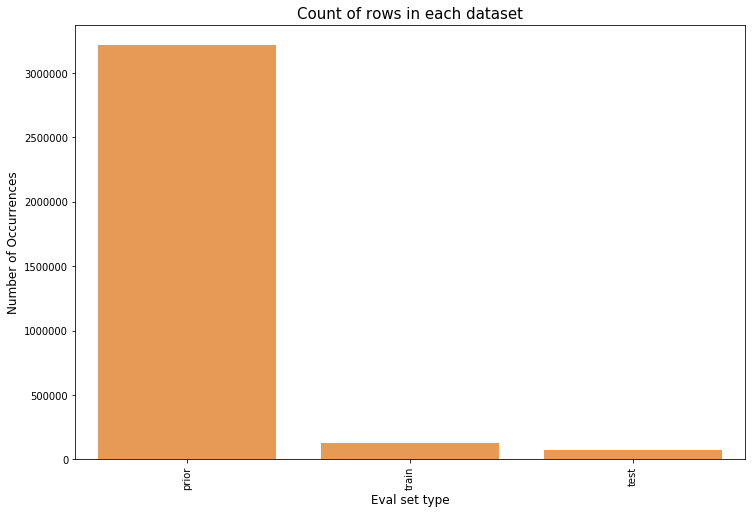

In [51]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()
